In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import math 
import collections
from pycocotools.coco import COCO
import requests
import plotly.express as px
import plotly.graph_objects as go
from os import listdir
from os.path import isfile, join
import base64
import itertools
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
sns.set(style='whitegrid', font_scale=1.6, font='Georgia', context='paper')

from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import operator
import plotly.figure_factory as ff
import scipy
import pickle 
from sklearn.neighbors import KernelDensity
from tqdm import tqdm
from collections import OrderedDict

/tmp/ipykernel_17350/1341984599.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [12]:
sampling_base = '../../../src/dataset_selection/sampling/samples/LXR111/multilabel_full/'
base_path = '../../../snap/vqa/lxr111_multilabel_full_run_3/'
#sampling_path = 'beta/beta_kernel/tophat/seed_965/alpha_2_beta_1_budget_30.pkl'
sampling_path = 'beta/beta_pvals/seed_965/alpha_1_beta_2_budget_30.pkl'
df = pd.read_pickle(base_path+"datamap_metrics.pkl")

with open(sampling_base + sampling_path, 'rb') as f:
    sampled_ids = pickle.load(f)

df_sampled = df.loc[df['question_id'].isin(sampled_ids)] 



In [51]:
all_questions = df['Question'].tolist()

all_questions_preprocessed = []

for quest in all_questions:
    all_questions_preprocessed.append(quest[0].lower().split()[:4]) # crop questions by their first four words

In [52]:
first_word_freq = {}
for i in all_questions_preprocessed:
    if "'" in i[0]:
        contraction = i[0].index("'")
        first_word = i[0][:contraction]
    else:
        first_word = i[0]
    if first_word not in first_word_freq:
        first_word_freq[first_word] = 1
    else:
        first_word_freq[first_word] += 1

top_stems = dict(sorted(first_word_freq.items(), key=lambda x:x[1], reverse=True)[:15])

subset_questions = []
for stem in top_stems:
    for i in all_questions_preprocessed:
        if i[0].startswith(stem):
            subset_questions.append(i)

In [58]:
# for each stem in top_stems, create a subgroup for the second word
second_freq = {}
third_freq = {}
fourth_freq = {}

for stem in tqdm(top_stems):
    for i in subset_questions:
        if "'" in i[0]:
            contraction = i[0].index("'")
            i[0] = i[0][:contraction]
        full_question = ' '.join(i)
        if full_question.startswith(stem):
            first_two_words = ' '.join(full_question.split()[:2])
            first_three_words = ' '.join(full_question.split()[:3])
            first_four_words = ' '.join(full_question.split())

            if first_two_words not in second_freq:
                second_freq[first_two_words] = 1
            else:
                second_freq[first_two_words] += 1

            if first_three_words not in third_freq:
                third_freq[first_three_words] = 1
            else:
                third_freq[first_three_words] += 1
            if first_four_words not in fourth_freq:
                fourth_freq[first_four_words] = 1
            else:
                fourth_freq[first_four_words] += 1

100%|██████████| 15/15 [00:05<00:00,  2.60it/s]


findfont: Font family ['Georgia'] not found. Falling back to DejaVu Sans.


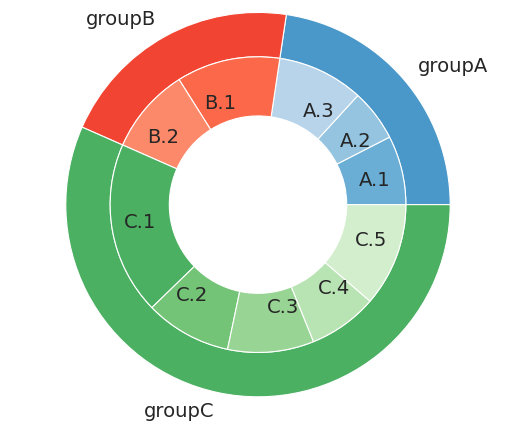

In [32]:
# Make data: I have 3 groups and 7 subgroups
group_names=['groupA', 'groupB', 'groupC']
group_size=[12,11,30]
subgroup_names=['A.1', 'A.2', 'A.3', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'C.5']
subgroup_size=[4,3,5,6,5,10,5,5,4,6]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6)] )
plt.setp( mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), c(0.6), c(0.5), c(0.4), c(0.3), c(0.2)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()